In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# data_dir = '../data'
data_dir = '/content/gdrive/Shareddrives/520_Project'
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
sns.set_style("whitegrid")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set(font_scale=1.2)

In [ ]:
data = pd.read_csv(os.path.join(data_dir, "Womens_Clothing_E-Commerce_Reviews.csv"))
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
print('Column','\t&','Data Type','\t&','#Unique','\t&','Min','\t&','Mean','\t&','Max')
for idx,col in enumerate(data.columns[1:]):
    print(col,'\t&',list(data.dtypes)[idx],'\t&',len(set(data[col])),end = '')
    if str(list(data.dtypes)[idx]) != 'object':
      cur = [i for i in data[col] if type(i)!=str]
      print('\t&', min(cur),'\t&', np.mean(cur),'\t&',max(cur),'\\\hline')
    else:
      print('\t&', '-','\t&', '-','\t&','-','\\\hline')

Column 	& Data Type 	& #Unique 	& Min 	& Mean 	& Max
Clothing ID 	& int64 	& 1206	& 0 	& 918.1187090181385 	& 1205 \\hline
Age 	& int64 	& 77	& 18 	& 43.198543813335604 	& 99 \\hline
Title 	& int64 	& 13994	& nan 	& nan 	& nan \\hline
Review Text 	& object 	& 22635	& - 	& - 	& - \\hline
Rating 	& object 	& 5	& - 	& - 	& - \\hline
Recommended IND 	& int64 	& 2	& 0 	& 0.8223622583666865 	& 1 \\hline
Positive Feedback Count 	& int64 	& 82	& 0 	& 2.535936302478072 	& 122 \\hline
Division Name 	& int64 	& 4	& nan 	& nan 	& nan \\hline
Department Name 	& object 	& 7	& - 	& - 	& - \\hline
Class Name 	& object 	& 21	& - 	& - 	& - \\hline


In [ ]:
# data['Rating']
cur = [int(i) for i in data['Rating']]
print(min(cur),'\t&', np.mean(cur),'\t&',max(cur))

1 	& 4.196031678446734 	& 5


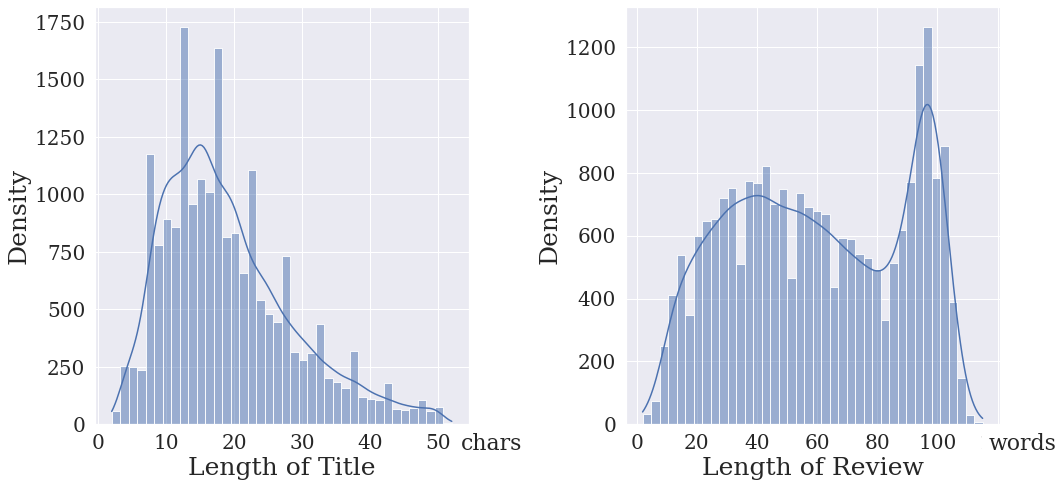

In [ ]:
title_len = [len(i) for i in list(data['Title']) if not str(i)=='nan']
review_len = [len(i.split()) for i in list(data['Review Text'])  if not str(i)=='nan']
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
fig, (ax1, ax2)= plt.subplots(1,2,figsize = (15,7))
sns.histplot(title_len,kde=True,bins = 40, ax=ax1)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax1.text(0.98, -0.02, 'chars', transform=ax1.transAxes, fontsize=22,
        verticalalignment='top', bbox=props)

ax1.set_xlabel('Length of Title',fontsize = 25)
ax1.set_ylabel('Density',fontsize = 25)
ax1.set_title('', fontsize=10)
for tick in ax1.xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(20)
for tick in ax1.yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(20)

sns.histplot(review_len,kde=True,bins = 40, ax=ax2)
props = dict(boxstyle='round', facecolor='white', alpha=1)
ax2.text(0.97, -0.02, 'words', transform=ax2.transAxes, fontsize=22,
        verticalalignment='top', bbox=props)
# ax1.set_xticks([0,20,40,60,80,100])
ax2.set_xlabel('Length of Review',fontsize = 25)
ax2.set_ylabel('Density',fontsize = 25)
ax2.set_title('', fontsize=10)
for tick in ax2.xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(20) 
for tick in ax2.yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(20) 
# plt.suptitle('Distribution of Text Length',fontsize = 24)
plt.tight_layout()
plt.savefig('title_review_len.jpg',dpi=300)
plt.show()

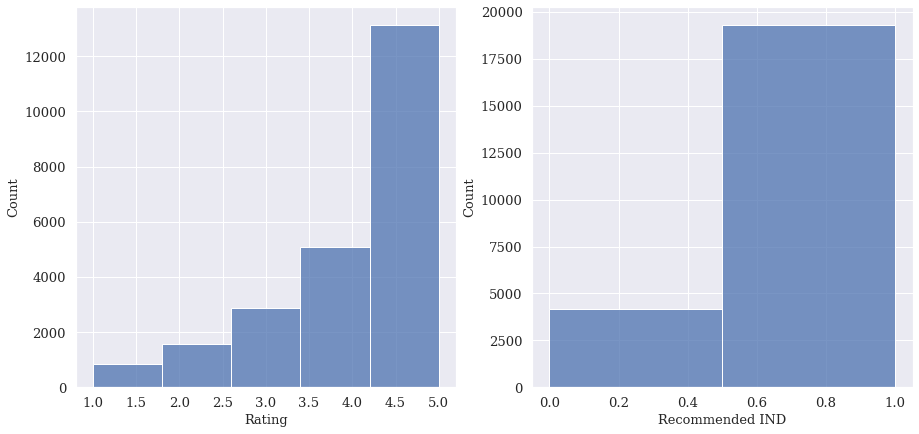

In [ ]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(15,7))
sns.histplot(data['Rating'], kde=False, bins=5, ax=ax1)
ax1.set_xlabel('Rating', fontsize=13)
ax1.set_ylabel('Count', fontsize=13)
ax1.set_title('', fontsize=10)

sns.histplot(data['Recommended IND'], kde=False, bins=2, ax=ax2)
ax2.set_xlabel('Recommended IND', fontsize=13)
ax2.set_ylabel('Count', fontsize=13)
ax2.set_title('', fontsize=10)
plt.show()

In [ ]:
sum(data['Recommended IND']) / len(data['Recommended IND'])

0.8223622583666865

In [ ]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
print('Training set size',int(0.8*len(data)),'\tvalidation set size',int(0.2*len(data)),'\tTesting set size',int(0.2*len(data)))
print('Avg. title length',np.mean([len(i) for i in list(data['Title']) if not str(i)=='nan']),
        'Avg. Review length', np.mean([len(i) for i in list(data['Review Text'])  if not str(i)=='nan'])) # maybe recalculate after tokenize

Training set size 18788 	validation set size 4697 	Testing set size 4697
Avg. title length 19.096767635698313 Avg. Review length 308.6879113113378


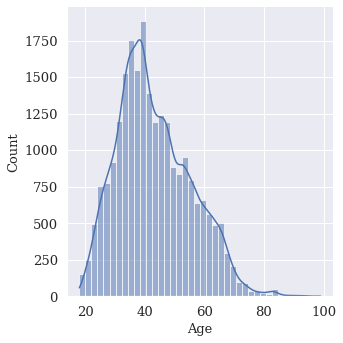

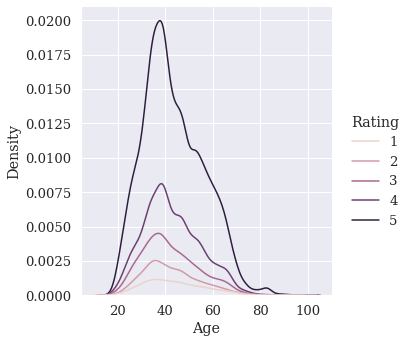

Text(0.5, 0, 'Rate')

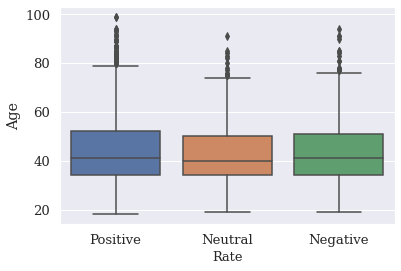

In [ ]:
# fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2,figsize = (15,10))
sns.displot(data['Age'],kde=True,bins = 40)
plt.xlabel('Age',fontsize = 13)
plt.ylabel('Count',fontsize = 13)
plt.title('', fontsize=10)
plt.tight_layout()
plt.show()
sns.displot(data=data, x="Age", hue="Rating", kind="kde")
plt.show()
# sns.jointplot(data=data, x="Age", y="Rating", kind="reg")
def rate_type(x):
    if x>3: return 'Positive'
    elif x<3: return 'Negative'
    else: return 'Neutral'
data['rate type'] = data['Rating'].apply(lambda x: rate_type(x))
sns.boxplot(x="rate type", y="Age", data=data)
plt.xlabel('Rate',fontsize = 13)
# sns.boxplot(x="Recommended IND", y="Age", data=data)

In [ ]:
list(set(data["Division Name"]))
division_std = [[],[],[]]
ds = list(set(data["Division Name"]))[:-1]
for rate in [i+1 for i in range(5)]:
  total = len(data[data['Rating']==rate])
  for idx,d in enumerate(list(set(data["Division Name"]))[:-1]):
    # print(d,rate, total)
    division_std[idx].append(len(data[(data['Division Name']==d) & (data['Rating']==rate)]) / total)
division_std = np.array(division_std)
# print(division_std)

In [ ]:
x, d, v = [],[],[]
for i in range(5):
  for j in range(3):
    percent = division_std[j][i]
    # print(i,j,division_std[j][i])
    if j==0: percent = 1
    for k in range(int(percent*100)):
      x.append(i+1)
      d.append(ds[j])
      v.append(1)
tmp = pd.DataFrame({'x':x,'d':d,'v':v})
# tmp.head()

In [ ]:
# sns.displot(data = tmp,x="x", hue="d", multiple="stack",bins = 5)
# plt.legend()
# plt.show()

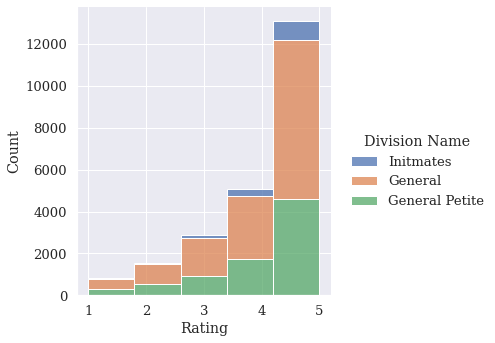

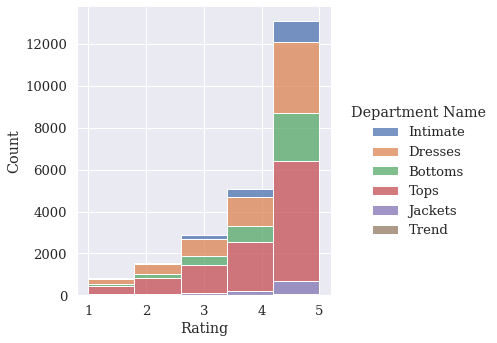

In [ ]:
sns.displot(data=data, x="Rating", hue="Division Name", multiple="stack",bins = 5)
sns.displot(data=data, x="Rating", hue="Department Name", multiple="stack",bins = 5)
# len(list(set(data['Division Name']))) # 4
# len(list(set(data['Department Name']))) # 7
# len(list(set(data['Class Name']))) # 21

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
def preprocess_text(x):
    if type(x) != str: return(x)
    x = x.lower()
    lemmatizer = WordNetLemmatizer()
    porter_stemmer = PorterStemmer()
    x = " ".join([lemmatizer.lemmatize(word) for word in x.split()])
    x = " ".join([porter_stemmer.stem(word) for word in x.split()])
    return x
    
data['Review Text'] = data['Review Text'].apply(lambda x : preprocess_text(x))

LookupError: ignored

In [ ]:
pos_comments = data[data['Recommended IND']==1]['Review Text']
pos_comments = [c for c in pos_comments if str(c)!='nan']
neg_comments = data[data['Recommended IND']==0]['Review Text']
neg_comments = [c for c in neg_comments if str(c)!='nan']
import wordcloud

In [ ]:
from collections import Counter
from IPython.display import Image
def gen_cloud(comments, ctype = 'pos'):
    w = wordcloud.WordCloud(width=1000,height=700,background_color='white')
    all = ' '.join(comments)
    tokens = [i for i in all.split()]
    comment_cnt = Counter(tokens)
    comment_cnt = sorted(comment_cnt.items(), key=lambda pair: pair[1], reverse=True)
    for pair in comment_cnt[:7]:
        all = all.replace(' '+pair[0]+' ',' ')
    all = all.replace('dress','')
    all = all.replace('top','')
    all = all.replace('look','')
    all = all.replace('wa','')
    w.generate(all)
    w.to_file(ctype+'_comment_wordcloud.png')
    return ctype+'_comment_wordcloud.png'
name = gen_cloud(neg_comments, ctype = 'neg')

name = gen_cloud(pos_comments, ctype = 'pos')
Image(filename=name)

In [ ]:
data.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


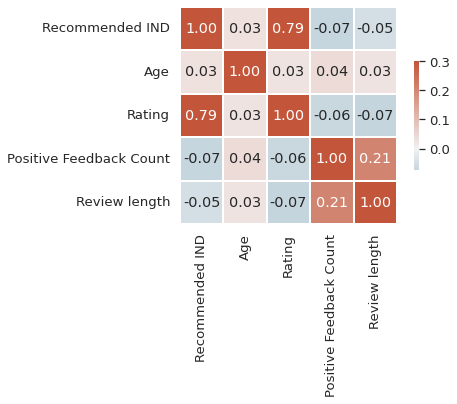

In [ ]:
d = data[['Recommended IND','Age','Rating','Positive Feedback Count']]
d['Review length'] = data['Review Text'].apply(lambda x: len(x) if type(x)==str else 0)
# Compute the correlation matrix
corr = d.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap = cmap, annot=True, fmt = ".2f",
            square=True, linewidths=.9, cbar_kws={"shrink": .5})
plt.show()